Dimensions of the image.
Height: 48
Width: 162


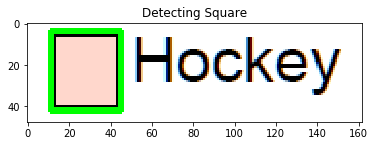

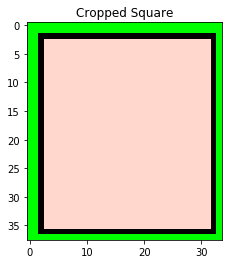

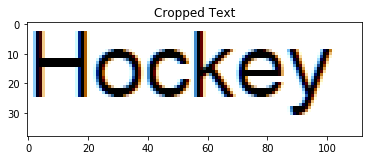

True

In [47]:
# Import necessary libraries
from matplotlib import pyplot as plt
import cv2

# Read image
image = cv2.imread('data_2/5.png')

# Height and width of the image
height, width = image.shape[:2]
print("Dimensions of the image.")
print("Height:",height)
print("Width:",width)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5,5), 0)


# Finding Edges
edges = cv2.Canny(gray, 60, 255)


# contours -> an outline representing or bounding the shape.
_,cnts, hierarchy = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(cnts, key=cv2.contourArea, reverse=True)[:10]
count = 1
for contour in contours:
    if(count<=4):
        #print("Count:",count)
        count = count + 1
        area = cv2.contourArea(contour)
        if area > 100000 and area < 1000:
            contours.remove(contour)
        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.01*perimeter, True)
        if len(approx) == 4:


            cv2.circle(image, (720, 360), 5, (255,0,0), 5)
            cv2.drawContours(image, [approx], -1, (0, 255, 0), 2)   
            M = cv2.moments(approx)

            centers = []
            if M["m00"] != 0:
                cX = int(M["m10"] / M["m00"])
                cY = int(M["m01"] / M["m00"])
            else:
                cX, cY = 0, 0

            P1 = approx[0]
            P1x = P1[0][0]
            P1y = P1[0][1]

            P2 = approx[1]
            P2x = P2[0][0]
            P2y = P2[0][1]

            P3 = approx[2]
            P3x = P3[0][0]
            P3y = P3[0][1]

            P4 = approx[3]
            P4x = P4[0][0]
            P4y = P4[0][1]
        
plt.imshow(image)
plt.title('Detecting Square')
plt.show()

# Cropping the square_image using array slices -- it's a NumPy array
cropped_square = image[P1y:P3y, P2x:P3x]

# Cropping the text image
cropped_text = image[P1y:P3y,P3x+5:width]

# Displaying the cropped square and cropped text image.
plt.imshow(cropped_square)
plt.title('Cropped Square')
plt.show()

plt.imshow(cropped_text)
plt.title('Cropped Text')
plt.show()

# Now saving the cropped square and cropped text image
cv2.imwrite('results/square1.png',cropped_square)
cv2.imwrite('results/text1.png',cropped_text)